sentimental analysis

In [4]:
import numpy as np
import pandas as pd
import nltk


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Df Read the CSV file
df=pd.read_csv('/content/sample_data/tweets.csv')

In [9]:
df

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


In [10]:
# see the size of the Data
df.shape

(7920, 3)

In [11]:
# see Info of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [12]:
# Check for any null value, 0 is oK
df.isnull().any(axis=1).sum()

0

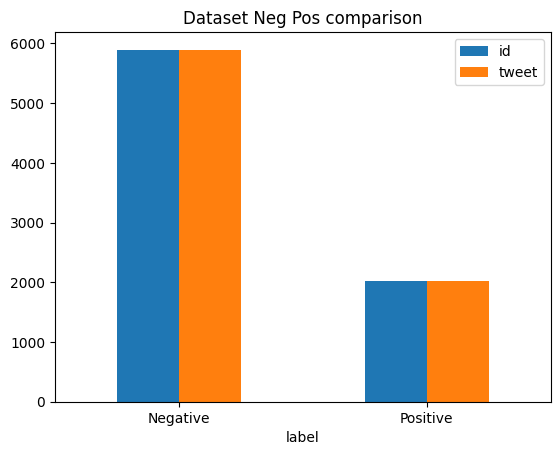

In [13]:
# Plotting the distribution for dataset.
ax = df.groupby('label').count().plot(kind='bar', title='Dataset Neg Pos comparison')
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['tweet']), list(df['label'])

In [14]:
df.drop('id',axis=1, inplace=True)
df.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0,Finally a transparant silicon case ^^ Thanks t...
2,0,We love this! Would you go? #talk #makememorie...
3,0,I'm wired I know I'm George I was made that wa...
4,1,What amazing service! Apple won't even talk to...


In [15]:
data_pos = df[df['label'] == 1]
data_neg = df[df['label'] == 0]


In [16]:
ds = pd.concat([data_pos, data_neg])


In [17]:
ds['tweet']=ds['tweet'].str.lower()
ds['tweet']

4       what amazing service! apple won't even talk to...
5       iphone software update fucked up my phone big ...
10      hey #apple when you make a new ipod dont make ...
11      ha! not heavy machinery but it does what i nee...
12      contemplating giving in to the iphone bandwago...
                              ...                        
7915    live out loud #lol #liveoutloud #selfie #smile...
7916    we would like to wish you an amazing day! make...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my #smart #pocket #wifi stay conne...
7919    apple barcelona!!! #apple #store #bcn #barcelo...
Name: tweet, Length: 7920, dtype: object

In [18]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
from nltk.corpus import stopwords

In [20]:
stopword_set=set(stopwords.words('english'))

In [21]:
def cleaning_stopwords(tweet):
    return " ".join([word for word in str(tweet).split() if word not in stopword_set])
ds['tweet'] = ds['tweet'].apply(lambda text: cleaning_stopwords(text))
ds['tweet'].head()

4     amazing service! apple even talk question unle...
5     iphone software update fucked phone big time s...
10    hey #apple make new ipod dont make new color ....
11    ha! heavy machinery need to. @apple really dro...
12    contemplating giving iphone bandwagon simply #...
Name: tweet, dtype: object

In [22]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(tweet):
    translator = str.maketrans('', '', punctuations_list)
    return tweet.translate(translator)
ds['tweet']= ds['tweet'].apply(lambda x: cleaning_punctuations(x))
ds['tweet'].head()

4     amazing service apple even talk question unles...
5     iphone software update fucked phone big time s...
10    hey apple make new ipod dont make new color 2i...
11    ha heavy machinery need to apple really droppe...
12    contemplating giving iphone bandwagon simply c...
Name: tweet, dtype: object

In [23]:
import re

In [24]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
ds['tweet'] = ds['tweet'].apply(lambda x: cleaning_URLs(x))
ds['tweet'].tail()

7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely 90 year old neighbor ipad morni...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [25]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
ds['tweet'] = ds['tweet'].apply(lambda x: cleaning_numbers(x))
ds['tweet'].tail()

7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely  year old neighbor ipad morning...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [26]:
def cleaning_repeating_char(tweet):
    return re.sub(r'(.)1+', r'1', tweet)
ds['tweet'] = ds['tweet'].apply(lambda x: cleaning_repeating_char(x))
ds['tweet'].tail()

7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely  year old neighbor ipad morning...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [27]:
import nltk
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
tokenized_tweet = ds['tweet'].apply(lambda x: x.split())
tokenized_tweet.tail()

7915    [live, loud, lol, liveoutloud, selfie, smile, ...
7916    [would, like, wish, amazing, day, make, every,...
7917    [helping, lovely, year, old, neighbor, ipad, m...
7918    [finally, got, smart, pocket, wifi, stay, conn...
7919    [apple, barcelona, apple, store, bcn, barcelon...
Name: tweet, dtype: object

In [29]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
stem_tweet= tokenized_tweet.apply(lambda x: stemming_on_text(x))
stem_tweet.head()

4     [amazing, service, apple, even, talk, question...
5     [iphone, software, update, fucked, phone, big,...
10    [hey, apple, make, new, ipod, dont, make, new,...
11    [ha, heavy, machinery, need, to, apple, really...
12    [contemplating, giving, iphone, bandwagon, sim...
Name: tweet, dtype: object

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [31]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
lem_tweet = stem_tweet.apply(lambda x: lemmatizer_on_text(x))
lem_tweet.head()

4     [amazing, service, apple, even, talk, question...
5     [iphone, software, update, fucked, phone, big,...
10    [hey, apple, make, new, ipod, dont, make, new,...
11    [ha, heavy, machinery, need, to, apple, really...
12    [contemplating, giving, iphone, bandwagon, sim...
Name: tweet, dtype: object

In [32]:
X=lem_tweet
y=df.label

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.40, random_state=11)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
def my_tokenizer(tokens):
    return ' '.join(tokens)

In [37]:
X_train = [' '.join(tokens) for tokens in X_train]
X_test = [' '.join(tokens) for tokens in X_test]

In [38]:
non_strings = [doc for doc in X_train
               if not isinstance(doc, str)]
print(non_strings)


[]


In [39]:
tfidf_vect= TfidfVectorizer( tokenizer=my_tokenizer ,use_idf=True, smooth_idf=True, sublinear_tf=False)
X_train_tfidf = tfidf_vect.fit_transform(X_train)
feature_names = tfidf_vect.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [40]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

In [41]:
# Transform the train data
X_train_tfidf = vectoriser.fit_transform(X_train)
# Transform the test data
X_test_tfidf = vectoriser.fit_transform(X_test)

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
# model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn=KNeighborsClassifier(n_neighbors=7)

In [48]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [49]:
Y_pred=knn.predict(X_test)

In [51]:
from sklearn import metrics
("knn accuracy=",metrics.accuracy_score(y_test,Y_pred)*100)

('knn accuracy=', 71.33838383838383)